In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
dados = pd.read_csv('csv_result-ebay_confianca_completo.csv')

In [11]:
dados.shape

(5806, 75)

In [12]:
dados.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [18]:
dados.iloc[:, 2] = dados.iloc[:, 2] == 'B'

In [22]:
dados['blacklist'].value_counts()

blacklist
False    5022
True      784
Name: count, dtype: int64

In [30]:
X = dados.iloc[:, :-1].values
y = dados.iloc[:, -1].values

In [28]:
X.shape

(5806, 74)

In [32]:
y.shape

(5806,)

In [34]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7401032702237521

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_over, y_over = smote.fit_resample(X, y)

In [57]:
X_over.shape, y_over.shape

((8598, 74), (8598,))

In [86]:
np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299], dtype=int64))

In [59]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size = 0.2, random_state = 0)

In [61]:
from sklearn.ensemble import RandomForestClassifier
classifier_o = RandomForestClassifier()
classifier_o.fit(X_train_o, y_train_o)

RandomForestClassifier()

In [78]:
y_pred_o = classifier_o.predict(X_test_o)

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm_o = confusion_matrix(y_test_o, y_pred_o)
ac_o = accuracy_score(y_test_o, y_pred_o)

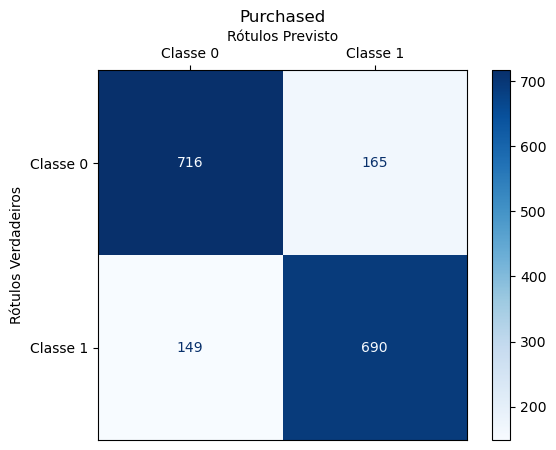

Acurácia: 81.74%


In [84]:
# Exibir a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Classe 0', 'Classe 1']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm_o, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Purchased")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo em formato percentual
print(f"Acurácia: {ac_o:.2%}")